In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

### Get data for SPY and GOOG

In [3]:
data = yf.download('GOOG SPY', start='2021-01-01', end='2022-01-01', progress=False)
data.head()

Adj Close                    Close                     High  \
                   GOOG         SPY         GOOG         SPY         GOOG   
Date                                                                        
2021-01-04  1728.239990  363.938812  1728.239990  368.790009  1760.650024   
2021-01-05  1740.920044  366.445343  1740.920044  371.329987  1747.670044   
2021-01-06  1735.290039  368.636139  1735.290039  373.549988  1748.000000   
2021-01-07  1787.250000  374.113159  1787.250000  379.100006  1788.400024   
2021-01-08  1807.209961  376.244720  1807.209961  381.260010  1809.839966   

                                Low                     Open              \
                   SPY         GOOG         SPY         GOOG         SPY   
Date                                                                       
2021-01-04  375.450012  1707.849976  364.820007  1757.540039  375.309998   
2021-01-05  372.500000  1718.015015  368.049988  1725.000000  368.100006   
2021-01-06  376.980011  1699.000000  369.119995  1702.630005  369.709991   
2021-01-07  379.899994  1737.050049  375.910004  1740.060059  376.100006   
2021-01-08  381.489990  1773.535034  377.100006  1787.979980  380.589996   

             Volume             
               GOOG        SPY  
Date                            
2021-01-04  1901900  110210800  
2021-01-05  1145300   66426200  
2021-01-06  2602100  107997700  
2021-01-07  2265000   68766800  
2021-01-08  2050600   71677200

In [4]:
data = yf.download('GOOG SPY', start='2021-01-01', end='2022-01-01', progress=False)['Close']
data.head()

,GOOG,SPY
Date,,
2021-01-04,1728.239990,368.790009
2021-01-05,1740.920044,371.329987
2021-01-06,1735.290039,373.549988
2021-01-07,1787.250000,379.100006
2021-01-08,1807.209961,381.260010


In [5]:
returns = np.log(data).diff()
returns.head()

,GOOG,SPY
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.007310,0.006864
2021-01-06,-0.003239,0.005961
2021-01-07,0.029504,0.014748
2021-01-08,0.011106,0.005682


In [6]:
returns.corr()

,GOOG,SPY
GOOG,1.000000,0.691421
SPY,0.691421,1.000000


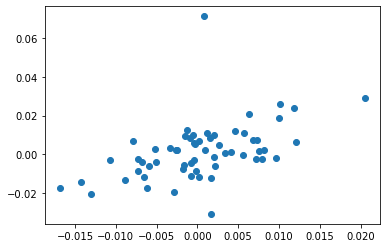

In [8]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [9]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([1.05035735, 0.00128829])

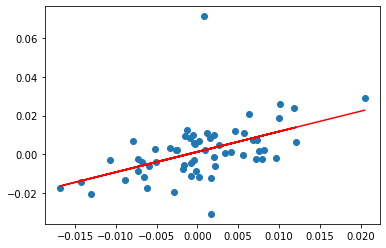

In [10]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample["SPY"], trend, 'r')

# Regression as a Technical Indicator

In [13]:
data = pd.DataFrame(yf.download('SPY', start='2021-01-01', end='2022-01-01', progress=False)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

,time,Close
Date,,
2021-12-27,248,477.26
2021-12-28,249,476.87
2021-12-29,250,477.48
2021-12-30,251,476.16
2021-12-31,252,474.96


In [14]:
reg = np.polyfit(data['time'], data['Close'], deg = 1)
reg

array([  0.38083816, 378.14345633])

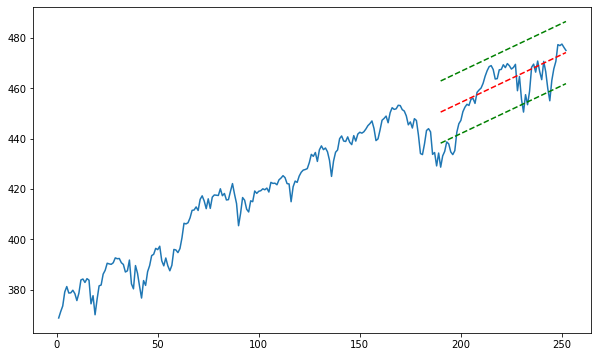

In [18]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['Close'], label ="S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--')

In [23]:
predict = np.poly1d(reg)
predict(250)

473.35299742744326

# Simple Scatter Plot with Trendline

<AxesSubplot:xlabel='time', ylabel='Close'>

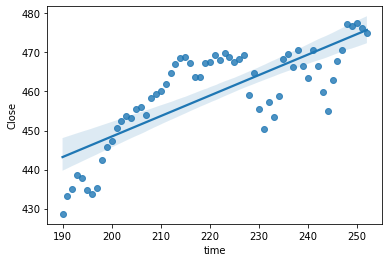

In [28]:
sb.regplot(x='time', y='Close', fit_reg=True, data=data[-63:])